In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Importing data
df = pd.read_csv(r"F:\abdulazimkhan\BI\Capstone_Project_BI\capstone_1\ml-news-classification-master\news-data.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
# Setting some style to plots
sns.set_style('darkgrid')
colors=["red","orange","green","navy","blue","aqua","purple","fuchsia"]

In [5]:
# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
# Dropping duplicates if any
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2126 non-null   object
 1   text      2126 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


## Some duplicate values were there which are now been removed.


In [9]:
df.describe()

,category,text
count,2126,2126
unique,5,2126
top,sport,worldcom ex-boss launches defence lawyers defe...
freq,504,1


In [10]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

<AxesSubplot:xlabel='category', ylabel='count'>

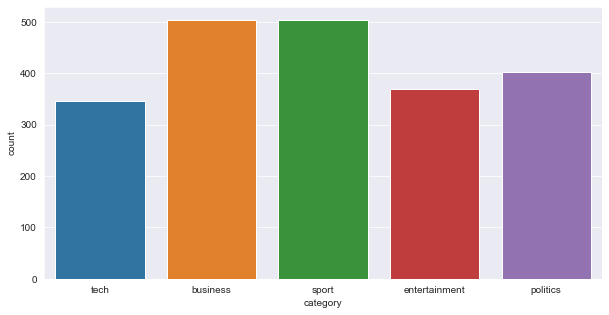

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="category",data=df)

### There is some error in seaborn count plot which can be seen compairing the number of data present in each category and bar heights. Let's do it some other way.

Text(0, 0.5, 'Counts')

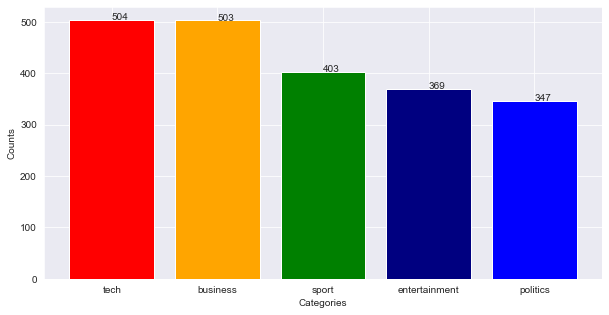

In [12]:
plt.figure(figsize=(10,5))
plt.bar(df["category"].unique(),df["category"].value_counts(),color=colors)
addlabels(df["category"].unique(),df["category"].value_counts())
plt.xlabel("Categories")
plt.ylabel("Counts")

In [13]:
# Value counts for each category of news
df["category"].value_counts()

sport            504
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

In [14]:
# Splitting the dataframe into X=Independent variable and y=Dependent variable
X= df["text"]
y = df["category"]

In [15]:
np.random.seed(42)

In [16]:
# Importing libraries and models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [17]:
# Saving all algorithms in a tuple so that we can check performance through iterating the tuple
algo=(SGDClassifier(),LogisticRegression(),RandomForestClassifier(),svm.SVC(),BernoulliNB(),GradientBoostingClassifier(),XGBClassifier(),MultinomialNB())

In [18]:
# Performing the train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1488,), (1488,), (638,), (638,))

In [20]:
from sklearn.metrics import f1_score

In [21]:
# Writing a function to check the f1 score against each algorithm
def evaluate(train_X,test_X,train_y,test_y):
    for i in range(len(algo)):
    
        pipeline_all = Pipeline([("vect",CountVectorizer()),("tfidf",TfidfTransformer()),("nb",algo[i])])
        model = pipeline_all.fit(train_X,train_y)
        y_predict = model.predict(test_X)
        print("f1 score for: ",algo[i],"------>",f1_score(test_y,y_predict,average='weighted')) 

In [22]:
evaluate(X_train,X_test,y_train,y_test)

f1 score for:  SGDClassifier() ------> 0.9796125434361976
f1 score for:  LogisticRegression() ------> 0.9795870099131648
f1 score for:  RandomForestClassifier() ------> 0.9557916044034765
f1 score for:  SVC() ------> 0.9780291212365817
f1 score for:  BernoulliNB() ------> 0.9344367919559114
f1 score for:  GradientBoostingClassifier() ------> 0.9528553191571912
[17:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score for:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight

### We saw the SGD and logistic regression are quiet good with f1 score values of `~0.97`.So now let's do further more experiments.

In [23]:
count_vectorizer = CountVectorizer(stop_words="english")

In [24]:
# Creating a pipeline for sgd classifier with certain perams to check
pipeline_sgd = Pipeline([("vect",count_vectorizer),("tfidf",TfidfTransformer()),("nb",SGDClassifier(loss="log",max_iter=19))])
sgd = pipeline_sgd.fit(X_train,y_train)
y_predict = sgd.predict(X_test)
f1_score(y_test,y_predict,average='weighted') 

0.9795725277856938

In [25]:
# Creating a pipeline for Logistic Regression and testing with different n_iter values
for i in range(10,200,10):
    pipeline_logistic = Pipeline([("vect",CountVectorizer()),("tfidf",TfidfTransformer()),("nb",LogisticRegression(max_iter=i))])
    lr = pipeline_logistic.fit(X_train,y_train)
    y_predict = lr.predict(X_test)
    print("f1_score for ",i,"iteration",f1_score(y_test,y_predict,average='weighted') )
    print("----------------------------------------------------------------------------------------")

f1_score for  10 iteration 0.9637388483890872
----------------------------------------------------------------------------------------
f1_score for  20 iteration 0.9811772570332867
----------------------------------------------------------------------------------------
f1_score for  30 iteration 0.9795870099131648
----------------------------------------------------------------------------------------
f1_score for  40 iteration 0.9795870099131648
----------------------------------------------------------------------------------------
f1_score for  50 iteration 0.9795870099131648
----------------------------------------------------------------------------------------
f1_score for  60 iteration 0.9795870099131648
----------------------------------------------------------------------------------------
f1_score for  70 iteration 0.9795870099131648
----------------------------------------------------------------------------------------
f1_score for  80 iteration 0.9795870099131648
---------

## Considering the SGD Classifier and testing on realworld data

In [26]:
count_vectorizer = CountVectorizer(stop_words="english")
tfidf =TfidfTransformer()


In [27]:
# Saving some current newsw as list and testing on model
new_data=["The unfurling of the tricolour at Times Square is part of the day-long celebrations to be organised by FIA on August 15, according to the association. The first India Day billboard at Times Square will be displayed for 24 hours, the Empire State Building will be lit in the colours of the Indian tricolour and the day will end with a gala cruise on the Hudson River to be attended by top government officials, special guests and members of the Indian American community. An Independence Day message will also be displayed on the largest Jumbotron at Times Square for 24 hours.",
          "FIA's current president Anil Bansal said the organisation will also hoist the tricolour at the State Capital in Rhode Island. FIA hoisted the tricolour at Times Square on India’s independence day last year as well, the first time the Indian national flag was unfurled at the iconic New York City destination.",
          "The Parliament session is over. As far as 60% of the country is concerned there has been no Parliament session. The voice of 60% of the country has been crushed, humiliated and yesterday in the Rajya Sabha physically beaten, said Rahul.",
          "AFRINIC operates a number of services that are critical for the functioning and the security of the Internet globally. Any destabilization of AFRINIC will therefore have a knock-on effect not only on the Internet in Africa but everywhere. AFRINIC also manages resources for African Internet operators and any disruption in operations, even for a limited time, could impact over 452 million African Internet users"]
predict = sgd.predict(new_data)


In [28]:
predict

array(['business', 'business', 'business', 'tech'], dtype='<U13')

In [29]:
# Trying to predict hte same data with Logistic Regression
y_predict2 = lr.predict(new_data)
y_predict2.shape,y_predict2

((4,), array(['business', 'business', 'business', 'tech'], dtype=object))

## Saving the above two models


In [30]:
# import pickle

In [31]:
# f = open("sgd.pickle","wb")
# pickle.dump(sgd,f)
# f.close()

# f = open("lr.pickle","wb")
# pickle.dump(lr,f)
# f.close()

## Let's try implementing Deep Learning methodologies


In [32]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import tensorflow as tf
print(tf.__version__)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


ModuleNotFoundError: No module named 'keras'

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def getLemmText(text):
    tokens=word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return ' ' .join(tokens)
df['text'] = list(map(getLemmText,df['text']))

In [ ]:
def getStemmText(text):
    tokens=word_tokenize(text)
    ps = PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    return ' ' .join(tokens)
df['text'] = list(map(getStemmText,df['text']))

In [ ]:
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(df.category.values)
np.unique(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text.values, labels, 
 stratify=y, 
 random_state=42, 
 test_size=0.2, shuffle=True)

In [ ]:
# Downloading glove
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# Unzipping it
!unzip glove*.zip

In [ ]:
# The exact extracted path
!ls
!pwd

In [ ]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()
print("Found %s word vectors." % len(embeddings_index))

In [ ]:
VOCABULARY_SIZE = 2000
MAX_LENGTH = 60

In [ ]:
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(list(X_train) + list(X_test))

In [ ]:
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_padding = sequence.pad_sequences(X_train_sequence, maxlen=MAX_LENGTH)
X_test_padding = sequence.pad_sequences(X_test_sequence, maxlen=MAX_LENGTH)
word_index = tokenizer.word_index

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
 100,
 weights=[embedding_matrix],
 input_length=MAX_LENGTH,
 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train_encode = np_utils.to_categorical(y_train)
y_test_encode = np_utils.to_categorical(y_test)

In [ ]:
history = model.fit( x=X_train_padding, y=y_train_encode, batch_size=256, epochs=20, verbose=1, validation_data=(X_test_padding, y_test_encode))

In [ ]:
def graph_plots(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
 

 graph_plots(history, "accuracy")
    graph_plots(history, "loss")